In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import os
import warnings
warnings.filterwarnings('ignore')

/home/user01/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
path = os.getcwd()

In [3]:
#importing the dataset
dataset = pd.read_csv(f"{path}/phishcoop.csv")
dataset

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,6988,1,-1,1,1,1,-1,1,1,-1,...,1,1,-1,1,1,1,1,0,1,1
6988,6989,-1,-1,1,1,1,-1,0,-1,1,...,1,1,-1,1,1,1,1,0,1,-1
6989,6990,-1,-1,1,1,1,-1,0,1,1,...,1,1,-1,1,1,1,1,0,1,1
6990,6991,-1,-1,1,-1,-1,1,-1,1,1,...,-1,1,-1,1,1,-1,-1,0,1,1


In [4]:
dataset = dataset.drop('id', 1) #removing unwanted column

x = dataset.iloc[ : , :-1].values
y = dataset.iloc[:, -1:].values

In [5]:
#spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state =0 )

In [6]:
#----------------applying grid search to find best performing parameters 
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 700],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}]

In [7]:
grid_search = GridSearchCV(RandomForestClassifier(),  parameters,cv =5, n_jobs= -1)
grid_search.fit(x_train, y_train)
#printing best parameters 
print("Best Accurancy =" +str( grid_search.best_score_))
print("best parameters =" + str(grid_search.best_params_)) 
#-------------------------------------------------------------------------

Best Accurancy =0.9713951491424039
best parameters ={'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 700}


In [8]:
#fitting RandomForest regression with best params 
classifier = RandomForestClassifier(n_estimators = 100, criterion = "gini", max_features = 'log2',  random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(max_features='log2', random_state=0)

In [9]:
#predicting the tests set result
y_pred = classifier.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9765446224256293

In [11]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[808  20]
 [ 21 899]]


In [12]:
import matplotlib.pyplot as plt
from sklearn import metrics

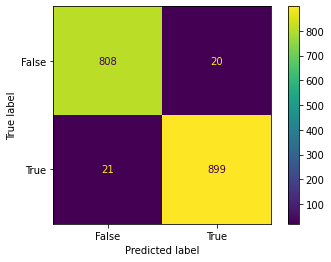

In [13]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [15]:
#pickle file joblib
joblib.dump(classifier, 'final_models/rf_final.pkl')

In [16]:
#-------------Features Importance random forest
names = dataset.iloc[:,:-1].columns
importances =classifier.feature_importances_
sorted_importances = sorted(importances, reverse=True)
indices = np.argsort(-importances)
var_imp = pd.DataFrame(sorted_importances, names[indices], columns=['importance'])

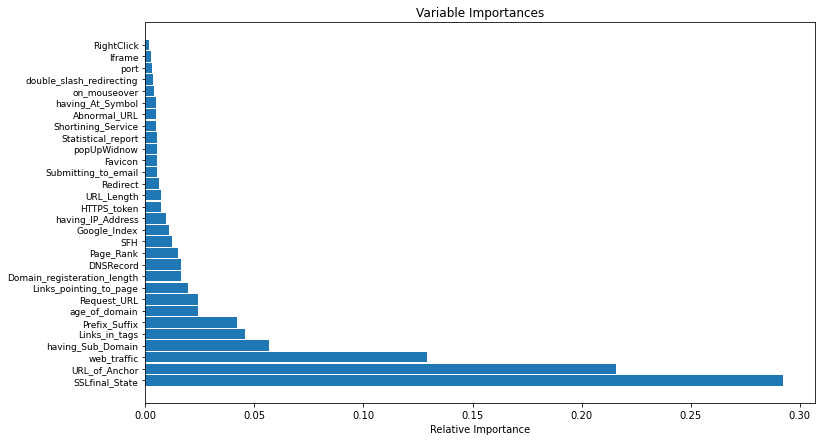

In [20]:
#-------------plotting variable importance
plt.figure(figsize= (12,7))
plt.title("Variable Importances")
plt.barh(np.arange(len(names)), sorted_importances, height = 0.9)
plt.yticks(np.arange(len(names)), names[indices], fontsize=9)
plt.xlabel('Relative Importance')
plt.show()